# Insights of Delhivery

Dataset from '/Users/luigi/Documents/Data_Analysis_Folio/Delhivery_Logistics_DataAnalysis/delhivery.csv'

In [4]:
# Initial Package to load
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import folium
from sklearn.cluster import KMeans

import plotly.express as px
import plotly.graph_objects as go 

# Google maps API package
import googlemaps

#
from datetime import datetime


## Lectura de datos


In [5]:
# Read data
data = pd.read_csv('/Users/luigi/Documents/Data_Analysis_Folio/Delhivery_Logistics_DataAnalysis/delhivery.csv')
data.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


### Características de los datos

In [6]:
data.shape


(144867, 24)

In [7]:
data.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

### Descriptiva estadística de mi dataset 

In [9]:
data.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [10]:
data.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

Suma de valores nulos en cada columna 

In [11]:
# Sum of Null values in each columns 
incomplete_values = data.isnull().sum()
incomplete_values

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

Eliminando columnas con valores faltantes para nuestro análisis

In [12]:
#Drop columns data
df = data
df.dropna(inplace=True)
df.isna().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

Ordernando columas por tipo de dato

In [13]:
numeric_data = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_data = df.select_dtypes(include=['bool', 'object']).columns.tolist()

print("Numeric columns:", numeric_data)
print("\nCategorical columns:", categorical_data)

Numeric columns: ['start_scan_to_end_scan', 'cutoff_factor', 'actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance', 'segment_factor']

Categorical columns: ['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type', 'trip_uuid', 'source_center', 'source_name', 'destination_center', 'destination_name', 'od_start_time', 'od_end_time', 'is_cutoff', 'cutoff_timestamp']


### Cantidad de tipos de ruta

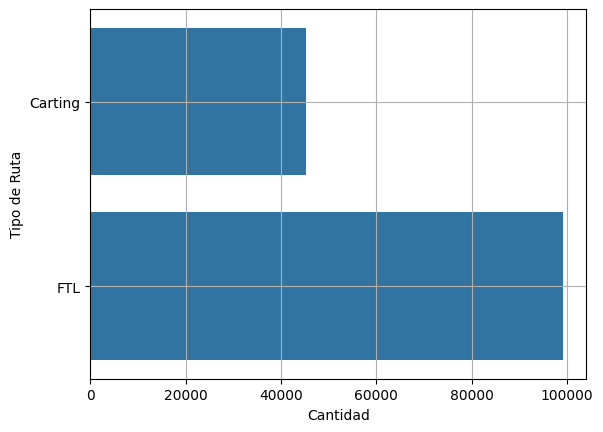

In [14]:
sns.countplot(y='route_type', data=df)
plt.ylabel('Tipo de Ruta')
plt.xlabel('Cantidad')
plt.grid()
plt.show()

## Distribución de los tipos de rutas

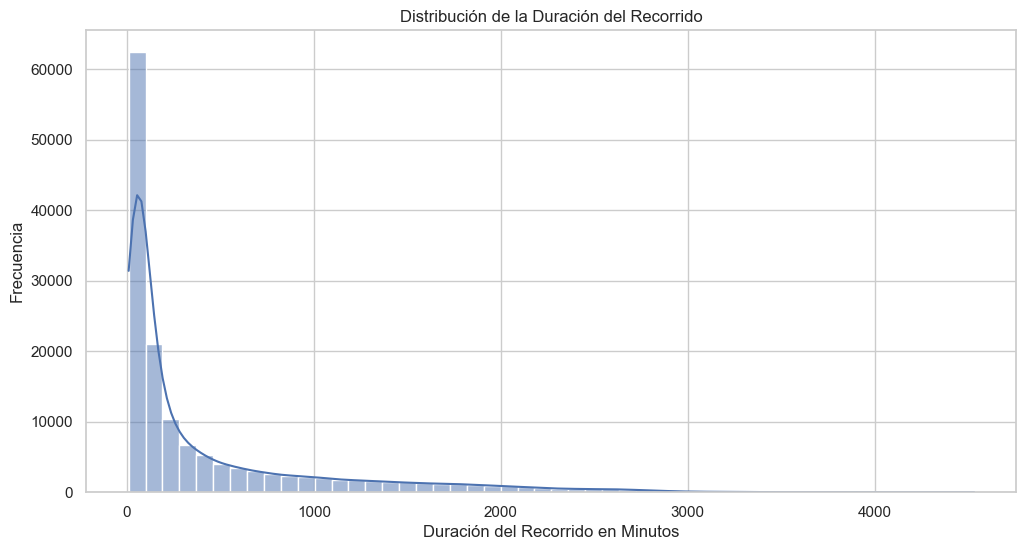

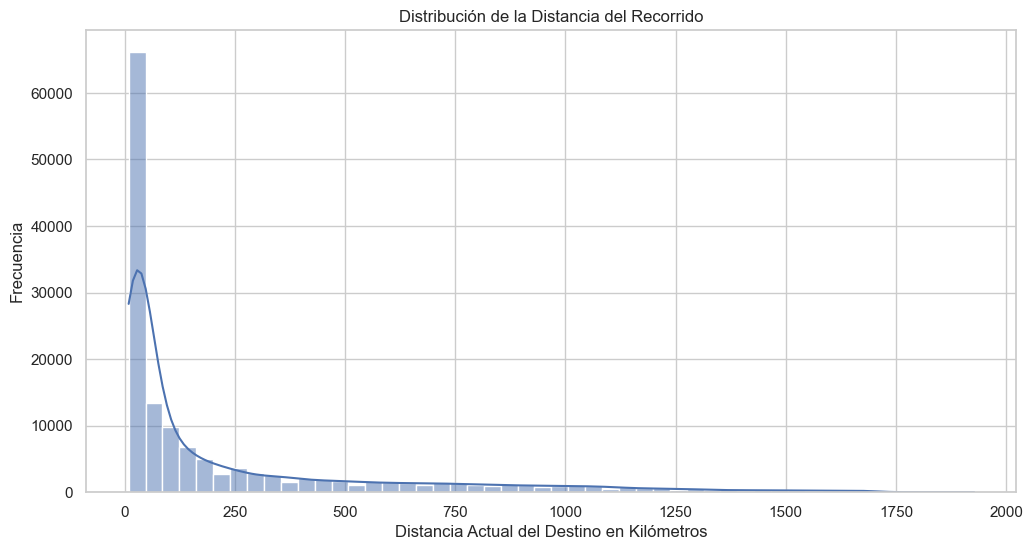

In [15]:
#set plot style
sns.set(style='whitegrid')

# Plot Distribution of trip duration
plt.figure(figsize=(12,6))
sns.histplot(df['actual_time'], bins=50, kde='true')
plt.title('Distribución de la Duración del Recorrido')
plt.xlabel('Duración del Recorrido en Minutos')
plt.ylabel('Frecuencia')
plt.show()

# Plot Distribution of trip distance
plt.figure(figsize=(12,6))
sns.histplot(df['actual_distance_to_destination'], bins=50, kde='true')
plt.title('Distribución de la Distancia del Recorrido')
plt.xlabel('Distancia Actual del Destino en Kilómetros')
plt.ylabel('Frecuencia')
plt.show()

## Relación entre la duración y la distancia del recorrido

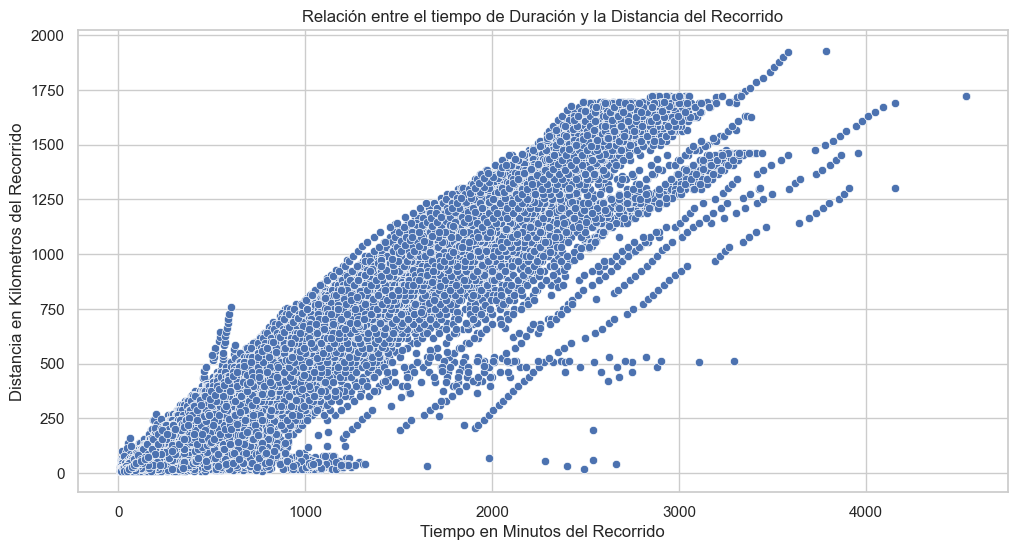

In [16]:
# Plot relationship duration and distance trip 
plt.figure(figsize=(12,6))
sns.scatterplot(x='actual_time', y='actual_distance_to_destination', data=df)
plt.title('Relación entre el tiempo de Duración y la Distancia del Recorrido')
plt.ylabel('Distancia en Kilometros del Recorrido')
plt.xlabel('Tiempo en Minutos del Recorrido')
plt.show()

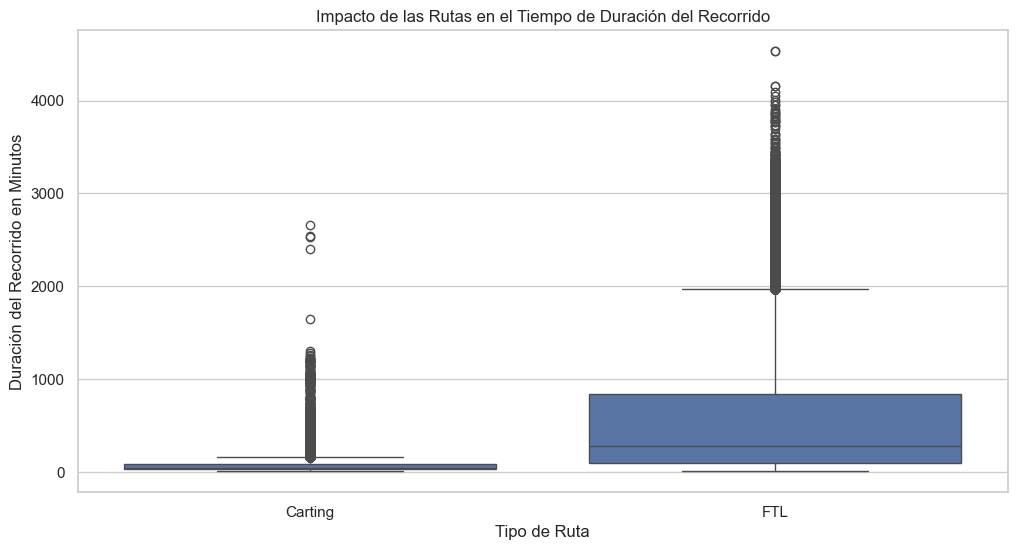

In [17]:
# Plot impact route type in trip duration
plt.figure(figsize=(12, 6))
sns.boxplot(x='route_type', y='actual_time', data=df)
plt.title('Impacto de las Rutas en el Tiempo de Duración del Recorrido')
plt.ylabel('Duración del Recorrido en Minutos')
plt.xlabel('Tipo de Ruta')
plt.show()

## Análisis de Estados con el mayor número de recorridos FTL y Carting

In [18]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


Formatos de hora y fecha

In [19]:
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['initial_format_time'] = df['od_start_time'].dt.strftime('%H:%M:%S')
df['initial_format_date'] = df['od_start_time'].dt.date
df['od_end_time'] = pd.to_datetime(df['od_end_time'])
df['final_format_time'] = df['od_end_time'].dt.strftime('%H:%M:%S')
df['final_format_date'] = df['od_end_time'].dt.date

df.drop(columns=['od_start_time', 'od_end_time'], inplace=True) 

#### Cantidad de valores únicos por ID de los recorrridos

Existen filas con valores que tienen un mismo identicador único ó ID, siendo estos valores de viajes que se realizaron en el mismo estado pero tuvieron variaciones en los recorridos. Estos valores pueden causar impresición y generar un sesgo en el análisis de datos.

In [20]:
# Get unique values for trip_uuid 
df['trip_uuid'].nunique()

14787

Agrupando únicos valores por ID

In [21]:
# Grouped dataframe in function of column trip_uuid
df_groupedby_ID = df.groupby('trip_uuid')

Al organizar los valores en función de su ID único, se puede observar que existen viajes/recorridos que tienen el mismo identificador único pero se mueven por distintas rutas 

### Normalizando los datos

In [22]:
df_computed = df_groupedby_ID.agg ({
    'route_type': 'first', 
    'source_name': 'first', 
    'destination_name': 'first',
    'actual_distance_to_destination': 'sum',
    'actual_time': 'sum',
    'segment_actual_time': 'mean',
    'segment_osrm_distance': 'mean',
    'segment_osrm_time': 'mean',
    'initial_format_time':'first',
    'initial_format_date': 'first'
}).reset_index()

df_computed

,trip_uuid,route_type,source_name,destination_name,actual_distance_to_destination,actual_time,segment_actual_time,segment_osrm_distance,segment_osrm_time,initial_format_date
0,trip-153671041653548748,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),8860.812105,15682.0,39.692308,33.858290,25.846154,2018-09-12
1,trip-153671042288605164,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),240.208306,399.0,15.666667,9.354378,7.222222,2018-09-12
2,trip-153671043369099517,FTL,Bangalore_Nelmngla_H (Karnataka),Gurgaon_Bilaspur_HB (Haryana),68163.502238,112225.0,37.168539,28.598515,21.808989,2018-09-12
3,trip-153671046011330457,Carting,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),28.529648,82.0,29.500000,9.938300,8.000000,2018-09-12
4,trip-153671052974046625,FTL,Bellary_Dc (Karnataka),Hospet (Karnataka),239.007304,556.0,48.571429,20.970271,16.428571,2018-09-12
...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,Carting,Chandigarh_Mehmdpur_H (Punjab),Zirakpur_DC (Punjab),141.057373,186.0,11.714286,9.265014,8.857143,2018-10-03
14783,trip-153861104386292051,Carting,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),25.130640,33.0,10.500000,8.044150,5.500000,2018-10-03
14784,trip-153861106442901555,Carting,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_GovndNgr_DC (Uttar Pradesh),93.743842,549.0,46.833333,17.481100,14.666667,2018-10-03
14785,trip-153861115439069069,Carting,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Eral_Busstand_D (Tamil Nadu),355.281673,600.0,15.176471,13.148965,13.000000,2018-10-03


Extrayendo carácteres de tipo "string" de las columnas source_name y destination_name

In [23]:
df_computed['source_state'] = df_computed['source_name'].str.extract(r'\((.*?)\)')
df_computed['destination_state'] = df_computed['destination_name'].str.extract(r'\((.*?)\)')
df_computed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   trip_uuid                       14787 non-null  object 
 1   route_type                      14787 non-null  object 
 2   source_name                     14787 non-null  object 
 3   destination_name                14787 non-null  object 
 4   actual_distance_to_destination  14787 non-null  float64
 5   actual_time                     14787 non-null  float64
 6   segment_actual_time             14787 non-null  float64
 7   segment_osrm_distance           14787 non-null  float64
 8   segment_osrm_time               14787 non-null  float64
 9   initial_format_date             14787 non-null  object 
 10  source_state                    14787 non-null  object 
 11  destination_state               14787 non-null  object 
dtypes: float64(5), object(7)
memory 

In [24]:
df_computed

,trip_uuid,route_type,source_name,destination_name,actual_distance_to_destination,actual_time,segment_actual_time,segment_osrm_distance,segment_osrm_time,initial_format_date,source_state,destination_state
0,trip-153671041653548748,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),8860.812105,15682.0,39.692308,33.858290,25.846154,2018-09-12,Madhya Pradesh,Uttar Pradesh
1,trip-153671042288605164,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),240.208306,399.0,15.666667,9.354378,7.222222,2018-09-12,Karnataka,Karnataka
2,trip-153671043369099517,FTL,Bangalore_Nelmngla_H (Karnataka),Gurgaon_Bilaspur_HB (Haryana),68163.502238,112225.0,37.168539,28.598515,21.808989,2018-09-12,Karnataka,Haryana
3,trip-153671046011330457,Carting,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),28.529648,82.0,29.500000,9.938300,8.000000,2018-09-12,Maharashtra,Maharashtra
4,trip-153671052974046625,FTL,Bellary_Dc (Karnataka),Hospet (Karnataka),239.007304,556.0,48.571429,20.970271,16.428571,2018-09-12,Karnataka,Karnataka
...,...,...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,Carting,Chandigarh_Mehmdpur_H (Punjab),Zirakpur_DC (Punjab),141.057373,186.0,11.714286,9.265014,8.857143,2018-10-03,Punjab,Punjab
14783,trip-153861104386292051,Carting,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),25.130640,33.0,10.500000,8.044150,5.500000,2018-10-03,Haryana,Haryana
14784,trip-153861106442901555,Carting,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_GovndNgr_DC (Uttar Pradesh),93.743842,549.0,46.833333,17.481100,14.666667,2018-10-03,Uttar Pradesh,Uttar Pradesh
14785,trip-153861115439069069,Carting,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Eral_Busstand_D (Tamil Nadu),355.281673,600.0,15.176471,13.148965,13.000000,2018-10-03,Tamil Nadu,Tamil Nadu


### Análisis carting

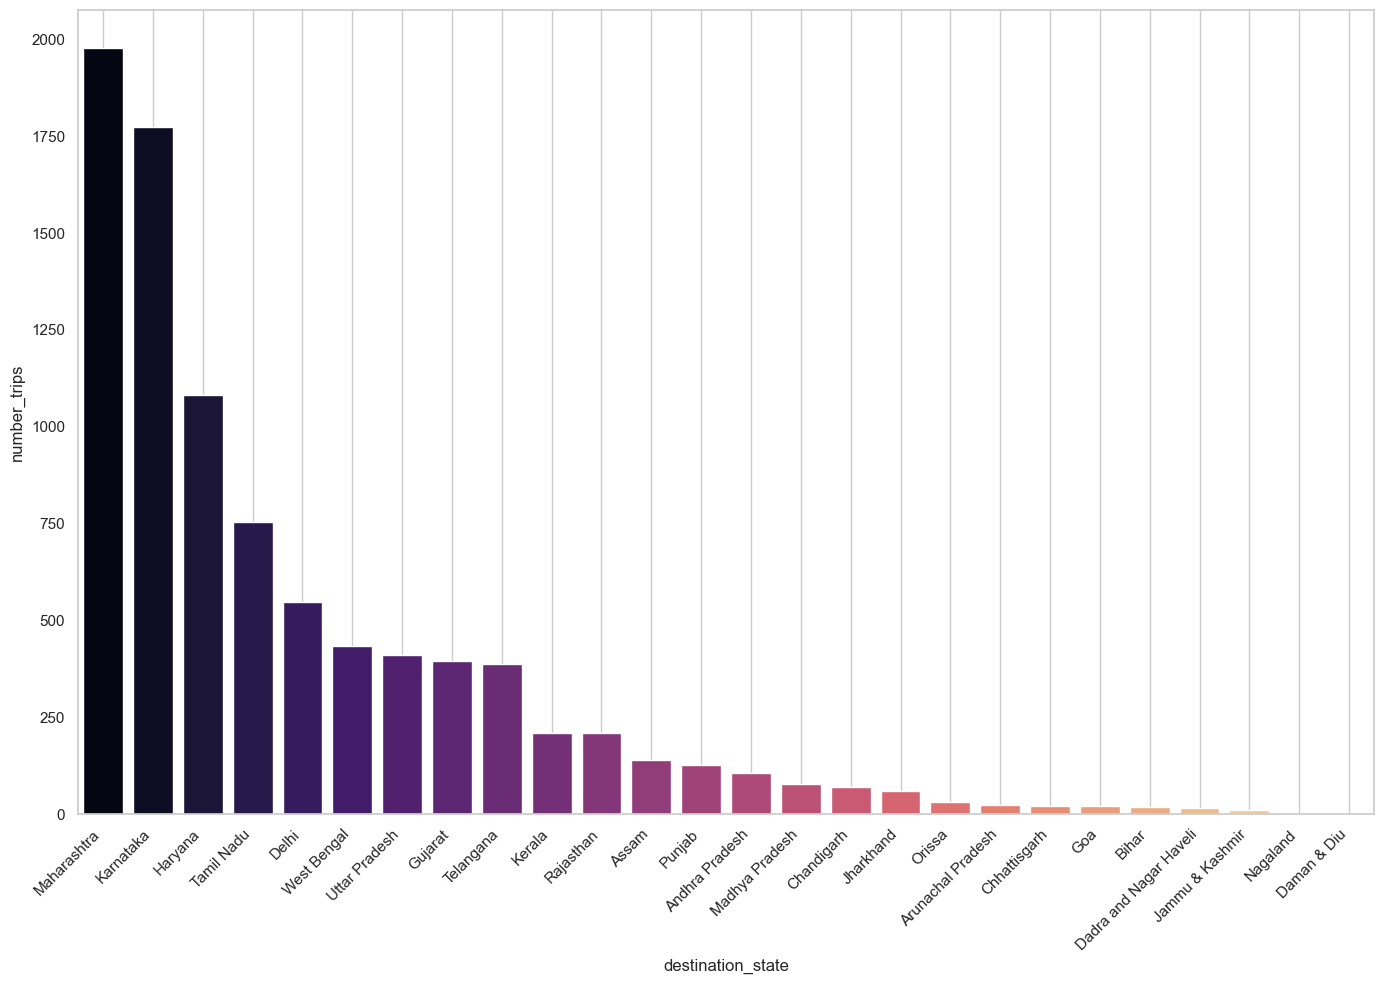

In [25]:
# Define Carting rows from route_type column
route_carting = df_computed[df_computed['route_type'] == 'Carting']

# Get value counts from destination_state 
df_carting_s = route_carting['source_state'].value_counts().reset_index()
df_carting_s.columns = ['source_state', 'number_source_trips']

df_carting = route_carting['destination_state'].value_counts().reset_index()
df_carting.columns = ['destination_state', 'number_trips']

# Barplot destination_state vs number_trips
plt.figure(figsize=(14,10))
sns.barplot(x='destination_state', y='number_trips', data=df_carting, palette='magma', hue='destination_state', legend=False)
plt.xticks(rotation=45, ha='right') #nombres
plt.tight_layout()
plt.grid()
plt.show()

Clasificando filas con route type igual a FTL

In [26]:
# Define FTL rows from route_type column
route_FTL = df_computed[df_computed['route_type'] == 'FTL']
# Group FTL trips by source_state and destination_state
groupby_FTL = route_FTL.groupby(['source_state', 'destination_state'])
# Get datatype of groupby_FTL
datatype_data = type(groupby_FTL)
print(datatype_data)



<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


Cantidad de recorridos en los estados de origen y destino

In [27]:
# Result dataframe 
df_number_trips = groupby_FTL.size().reset_index(name='number_trips')
df_number_trips

,source_state,destination_state,number_trips
0,Andhra Pradesh,Andhra Pradesh,265
1,Andhra Pradesh,Karnataka,14
2,Andhra Pradesh,Orissa,2
3,Andhra Pradesh,Telangana,16
4,Assam,Arunachal Pradesh,1
...,...,...,...
122,West Bengal,Bihar,1
123,West Bengal,Haryana,11
124,West Bengal,Jharkhand,20
125,West Bengal,Orissa,27


In [28]:
# Max value for number_trips column
df_number_trips['number_trips'].max()

np.int64(452)

"Pivoteando" valores con el número de destinos para los estados de origen y detino

In [29]:
heatmap_FTL = df_number_trips.pivot(index='source_state', columns='destination_state', values='number_trips').fillna(0)
#heatmap_FTL.isnull().sum()
#heatmap_FTL.fillna('x')

Mapa de calor con el número de viajes FTL Estado de Origen vs Estado de Destino

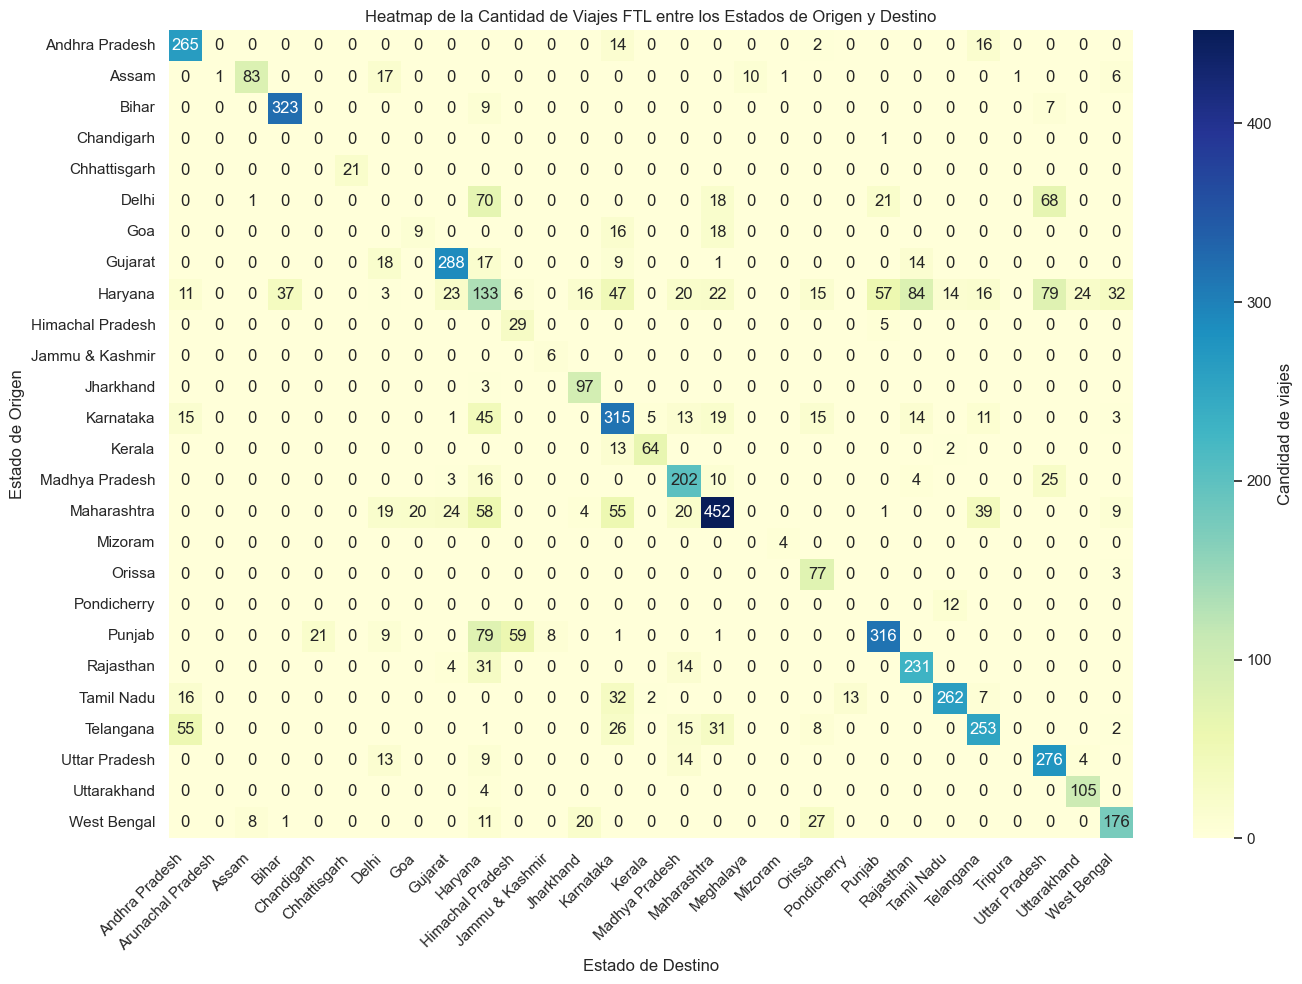

In [30]:
# Heatmap plot
plt.figure(figsize=(14, 10))
sns.heatmap(data=heatmap_FTL, cmap='YlGnBu', annot=True, fmt=".0f", cbar_kws={'label': 'Candidad de viajes'})
plt.title('Heatmap de la Cantidad de Viajes FTL entre los Estados de Origen y Destino')
plt.ylabel('Estado de Origen')
plt.xlabel('Estado de Destino')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Visualización de los estados en mapas identificando los clusters de las rutas con el algoritmo NO supervisado K-Means

In [31]:
df_carting['destination_state']

0                Maharashtra
1                  Karnataka
2                    Haryana
3                 Tamil Nadu
4                      Delhi
5                West Bengal
6              Uttar Pradesh
7                    Gujarat
8                  Telangana
9                     Kerala
10                 Rajasthan
11                     Assam
12                    Punjab
13            Andhra Pradesh
14            Madhya Pradesh
15                Chandigarh
16                 Jharkhand
17                    Orissa
18         Arunachal Pradesh
19              Chhattisgarh
20                       Goa
21                     Bihar
22    Dadra and Nagar Haveli
23           Jammu & Kashmir
24                  Nagaland
25               Daman & Diu
Name: destination_state, dtype: object

In [32]:
from geopy.geocoders import Nominatim
import time

state_address = ["Maharashtra", "Karnataka", "Haryana", "Tamil Nadu", "Delhi", "West Bengal", "Uttar Pradesh", "Gujarat", "Telangana", "Kerala", "Rajasthan", "Assam", "Punjab", "Andhra Pradesh", "Madhya Pradesh", "Chandigarh", "Jharkhand", "Orissa", "Chhattisgarh", "Goa", "Bihar", "Dadra and Nagar Haveli", "Jammu & Kashmir", "Nagaland", "Daman & Diu", "Uttarakhand", "Himachal Pradesh", "Arunachal Pradesh", "Pondicherry", "Meghalaya", "Tripura", "Mizoram"]

print(len(state_address))

#“Mizoram” "Arunachal", "Pradesh"
geolocator = Nominatim(user_agent="address_geocoder")

state_coords = {}

for i in state_address:
    
    location = geolocator.geocode(i)
    latitude = location.latitude
    longitude = location.longitude
    state_coords[i] = (latitude, longitude)
  
# Añadir una pausa para evitar sobrecargar la API
#time.sleep(0.5)
# Mostrar el diccionario con las coordenadas
print(state_coords)
#print(type(state_coords))

32


GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Kerala&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))

### Mapeando las coordenadas en los estados de origen y destino 

In [262]:
# Create source_coordanates and destination_coordenates columns with the maping source_state and destination_state data coords
df_computed['source_coordenates'] = df_computed['source_state'].map(state_coords)
df_computed['destination_coordenates'] = df_computed['destination_state'].map(state_coords)
df_computed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   trip_uuid                       14787 non-null  object 
 1   route_type                      14787 non-null  object 
 2   source_name                     14787 non-null  object 
 3   destination_name                14787 non-null  object 
 4   actual_distance_to_destination  14787 non-null  float64
 5   actual_time                     14787 non-null  float64
 6   segment_actual_time             14787 non-null  float64
 7   segment_osrm_distance           14787 non-null  float64
 8   segment_osrm_time               14787 non-null  float64
 9   initial_format_date             14787 non-null  object 
 10  source_state                    14787 non-null  object 
 11  destination_state               14787 non-null  object 
 12  source_coordenates              

In [263]:
# Combine coords data source and destination data in a list for clustering
combine_coords = df_computed['source_coordenates'].tolist() + df_computed['destination_coordenates'].tolist()
print(len(combine_coords))

# See NaN data from combine_coords
#combine_coords.count(None)

# clean None values from combine_coords
clean_coords = [coord for coord in combine_coords if coord is not None]

29574


### Clustering utilizando el algoritmo K-means

In [264]:
# Convert cleaned_coords list to np.array for K-Means (.fit only accept string or real number)
#coords_array = np.array(coords_numeric)

# K-Means clustering 
kmeans = KMeans(n_clusters=3, random_state=0).fit(clean_coords)
labels = kmeans.labels_

# Prepare source_lables and destination_labels 
source_labels = labels[:len(df_computed)]
destination_labels = labels[len(df_computed):]

# df_computed cluster labels
df_computed['source_clusters'] = source_labels
df_computed['destination_clusters'] = destination_labels

In [265]:
# Prepare data columns for plot 
df_source = df_computed[['source_state', 'source_coordenates', 'source_clusters']]
df_destination = df_computed[['destination_state', 'destination_coordenates', 'destination_clusters']]

df_source.columns = ['state', 'coords', 'cluster']
df_destination.columns = ['state', 'coords', 'cluster']
df_concat = pd.concat([df_source, df_destination])

# Split coordinates into latitude and longitude
df_concat['latitude'] = df_concat['coords'].apply(lambda x: x[0])
df_concat['longitude'] = df_concat['coords'].apply(lambda x: x[1])

# Plot with Plotly
fig = px.scatter_mapbox(
    df_concat,
    lat='latitude',
    lon='longitude',
    color='cluster',
    hover_name='state',
    zoom=5,
    title="Clustered Routes on Map"
)

# Map layout
fig.update_layout(mapbox_style="carto-positron", mapbox_zoom=5, mapbox_center={"lat": 20.5937, "lon": 78.9629})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## Eficiencia de las rutas

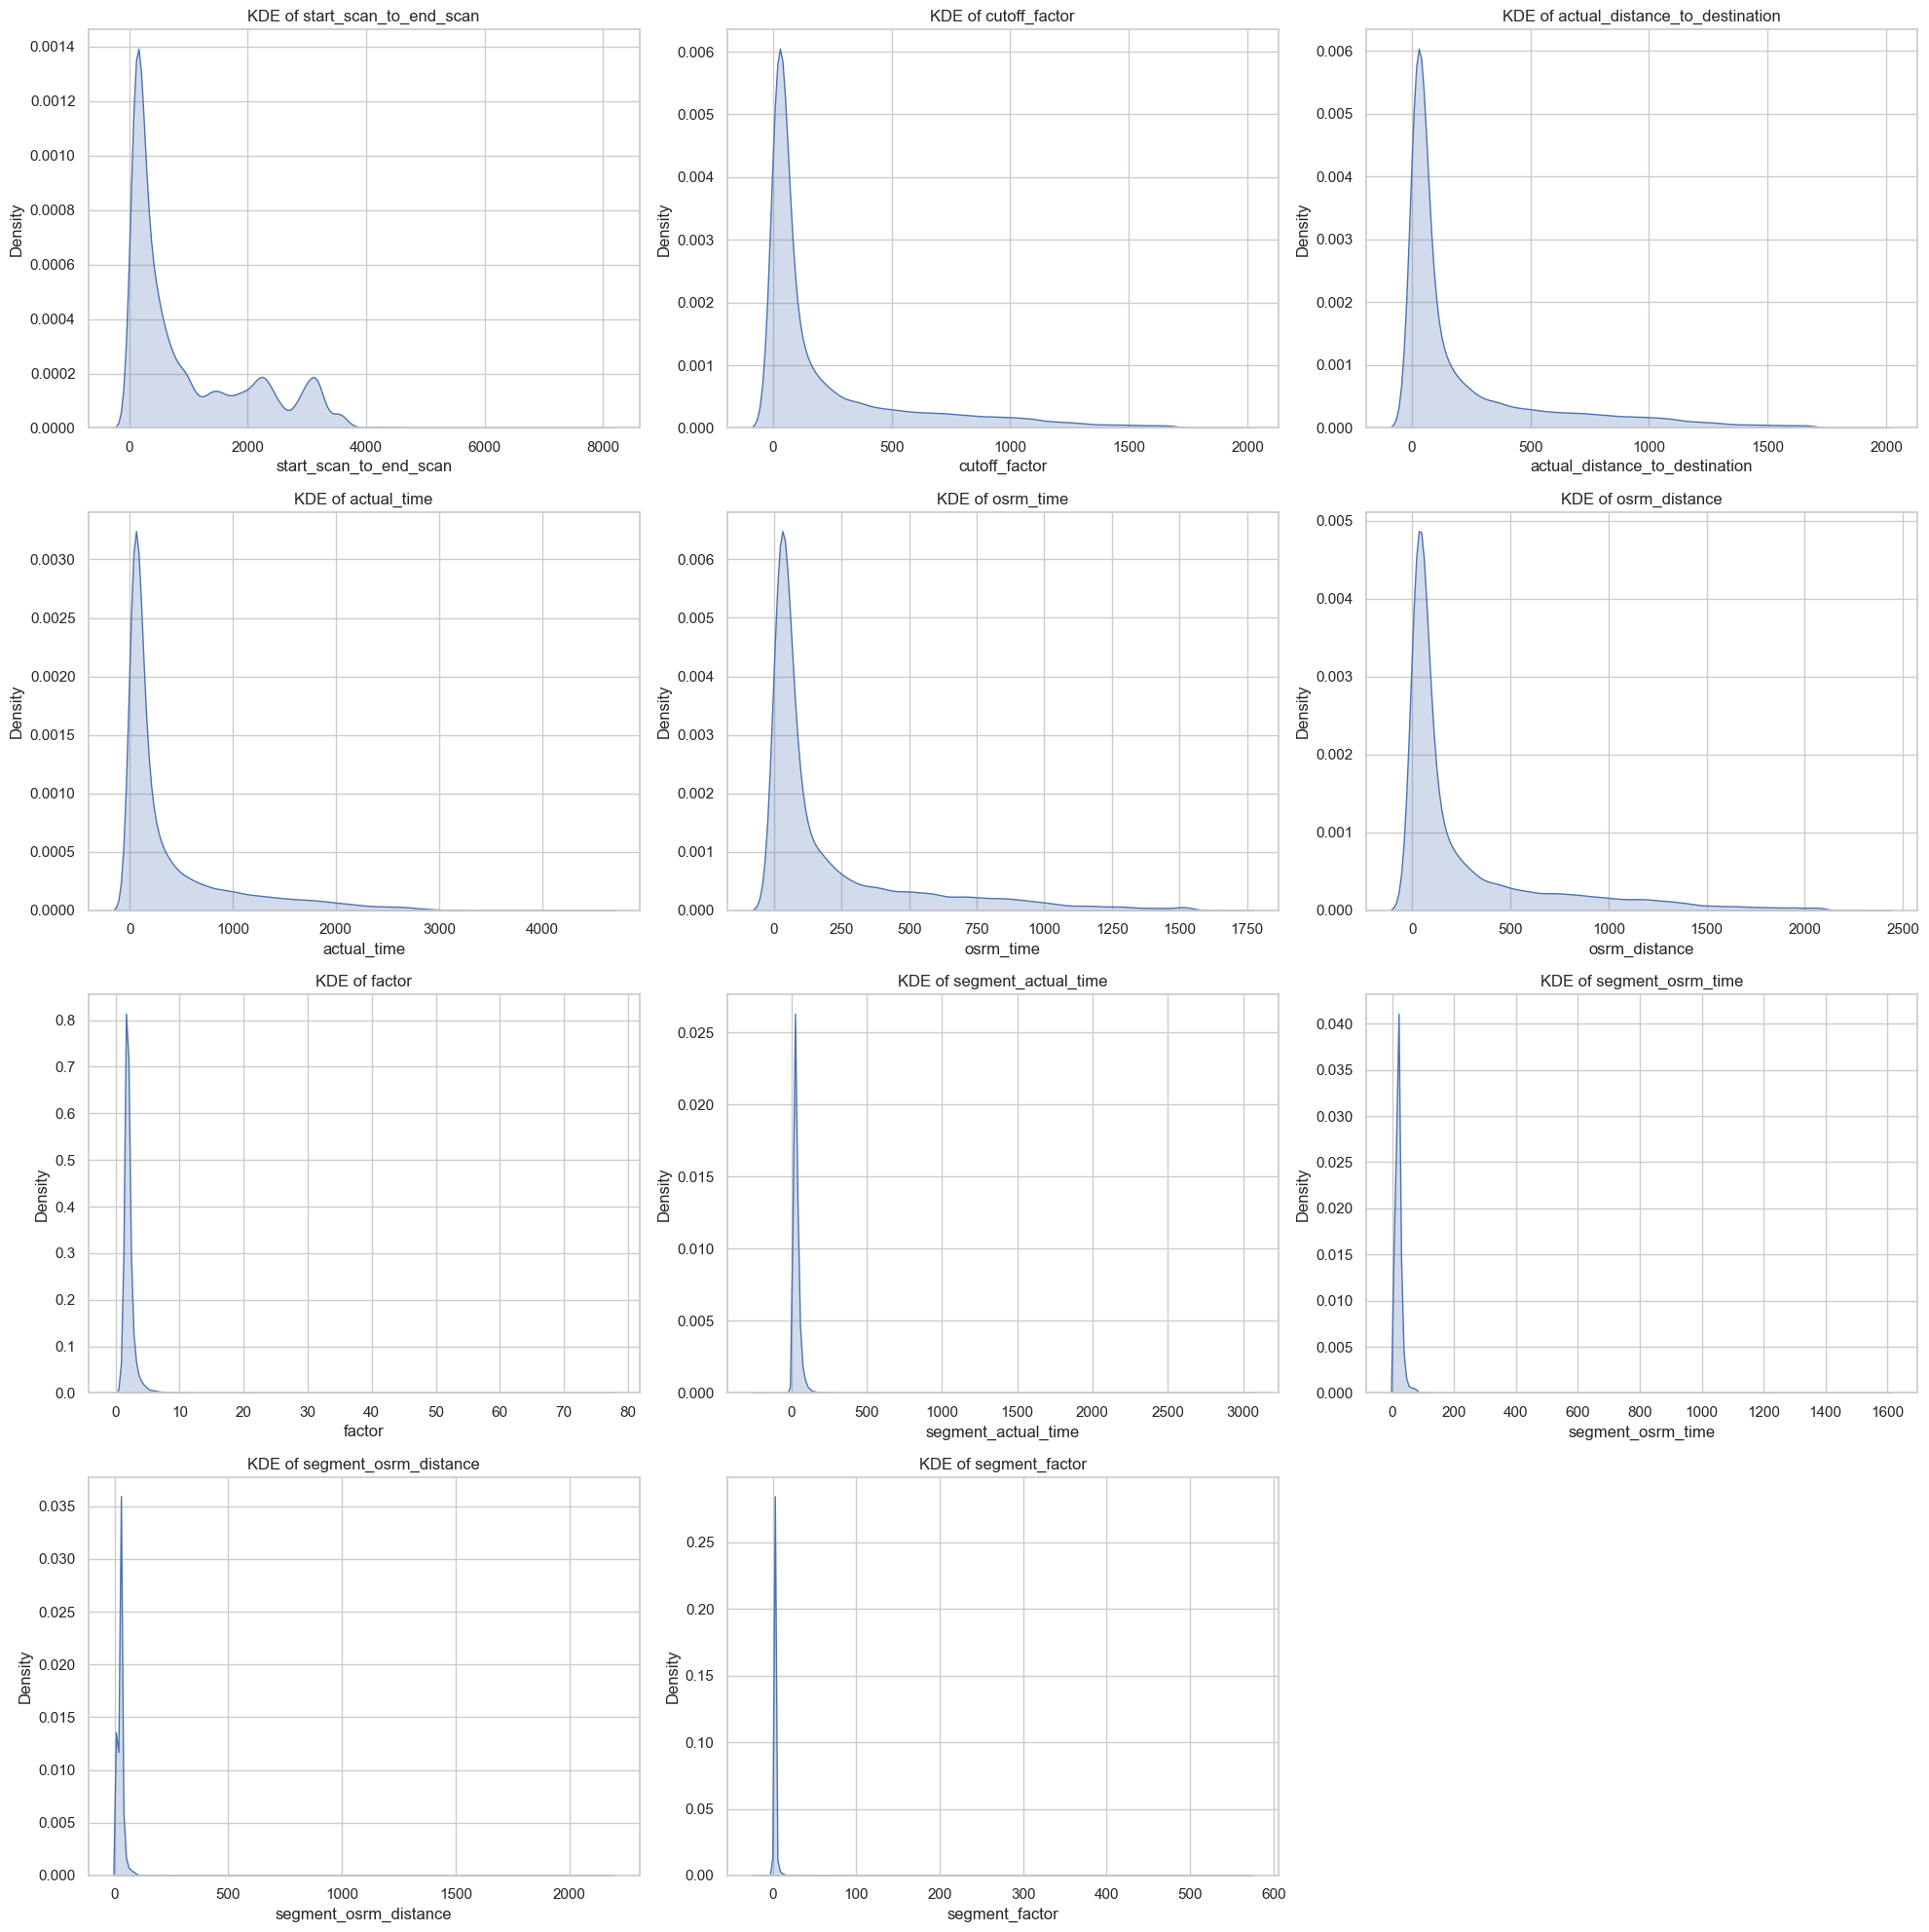

In [266]:
# Set up the plot
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
axes = axes.flatten()

# Create KDE plots for each numeric column
for i, column in enumerate(numeric_data):
    sns.kdeplot(data=df[column], ax=axes[i], fill=True)
    axes[i].set_title(f'KDE of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')
    
    # Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Calculo de la relación/proporción en la evaluación del rendimiento 

In [267]:
df_computed

,trip_uuid,route_type,source_name,destination_name,actual_distance_to_destination,actual_time,segment_actual_time,segment_osrm_distance,segment_osrm_time,initial_format_date,source_state,destination_state,source_coordenates,destination_coordenates,source_clusters,destination_clusters
0,trip-153671041653548748,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),8860.812105,15682.0,39.692308,33.858290,25.846154,2018-09-12,Madhya Pradesh,Uttar Pradesh,"(23.8143419, 77.5340719)","(27.1303344, 80.859666)",2,2
1,trip-153671042288605164,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),240.208306,399.0,15.666667,9.354378,7.222222,2018-09-12,Karnataka,Karnataka,"(14.5203896, 75.7223521)","(14.5203896, 75.7223521)",1,1
2,trip-153671043369099517,FTL,Bangalore_Nelmngla_H (Karnataka),Gurgaon_Bilaspur_HB (Haryana),68163.502238,112225.0,37.168539,28.598515,21.808989,2018-09-12,Karnataka,Haryana,"(14.5203896, 75.7223521)","(29.0, 76.0)",1,2
3,trip-153671046011330457,Carting,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),28.529648,82.0,29.500000,9.938300,8.000000,2018-09-12,Maharashtra,Maharashtra,"(18.9068356, 75.6741579)","(18.9068356, 75.6741579)",1,1
4,trip-153671052974046625,FTL,Bellary_Dc (Karnataka),Hospet (Karnataka),239.007304,556.0,48.571429,20.970271,16.428571,2018-09-12,Karnataka,Karnataka,"(14.5203896, 75.7223521)","(14.5203896, 75.7223521)",1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,Carting,Chandigarh_Mehmdpur_H (Punjab),Zirakpur_DC (Punjab),141.057373,186.0,11.714286,9.265014,8.857143,2018-10-03,Punjab,Punjab,"(30.9293211, 75.5004841)","(30.9293211, 75.5004841)",2,2
14783,trip-153861104386292051,Carting,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),25.130640,33.0,10.500000,8.044150,5.500000,2018-10-03,Haryana,Haryana,"(29.0, 76.0)","(29.0, 76.0)",2,2
14784,trip-153861106442901555,Carting,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_GovndNgr_DC (Uttar Pradesh),93.743842,549.0,46.833333,17.481100,14.666667,2018-10-03,Uttar Pradesh,Uttar Pradesh,"(27.1303344, 80.859666)","(27.1303344, 80.859666)",2,2
14785,trip-153861115439069069,Carting,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Eral_Busstand_D (Tamil Nadu),355.281673,600.0,15.176471,13.148965,13.000000,2018-10-03,Tamil Nadu,Tamil Nadu,"(10.9094334, 78.3665347)","(10.9094334, 78.3665347)",1,1


In [268]:
# Define ratio osrm_time and actual_time
df_computed['efficiency'] = df_computed['segment_actual_time']/df_computed['segment_osrm_time']

efficiency_threshold = 1

inefficient_data = df_computed[df_computed['efficiency'] > efficiency_threshold]

print(f"Filas con los datos de una eficiencia baja del tiempo estimado y el tiempo real: ")
inefficient_data



Filas con los datos de una eficiencia baja del tiempo estimado y el tiempo real: 


,trip_uuid,route_type,source_name,destination_name,actual_distance_to_destination,actual_time,segment_actual_time,segment_osrm_distance,segment_osrm_time,initial_format_date,source_state,destination_state,source_coordenates,destination_coordenates,source_clusters,destination_clusters,efficiency
0,trip-153671041653548748,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),8860.812105,15682.0,39.692308,33.858290,25.846154,2018-09-12,Madhya Pradesh,Uttar Pradesh,"(23.8143419, 77.5340719)","(27.1303344, 80.859666)",2,2,1.535714
1,trip-153671042288605164,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),240.208306,399.0,15.666667,9.354378,7.222222,2018-09-12,Karnataka,Karnataka,"(14.5203896, 75.7223521)","(14.5203896, 75.7223521)",1,1,2.169231
2,trip-153671043369099517,FTL,Bangalore_Nelmngla_H (Karnataka),Gurgaon_Bilaspur_HB (Haryana),68163.502238,112225.0,37.168539,28.598515,21.808989,2018-09-12,Karnataka,Haryana,"(14.5203896, 75.7223521)","(29.0, 76.0)",1,2,1.704276
3,trip-153671046011330457,Carting,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),28.529648,82.0,29.500000,9.938300,8.000000,2018-09-12,Maharashtra,Maharashtra,"(18.9068356, 75.6741579)","(18.9068356, 75.6741579)",1,1,3.687500
4,trip-153671052974046625,FTL,Bellary_Dc (Karnataka),Hospet (Karnataka),239.007304,556.0,48.571429,20.970271,16.428571,2018-09-12,Karnataka,Karnataka,"(14.5203896, 75.7223521)","(14.5203896, 75.7223521)",1,1,2.956522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,Carting,Chandigarh_Mehmdpur_H (Punjab),Zirakpur_DC (Punjab),141.057373,186.0,11.714286,9.265014,8.857143,2018-10-03,Punjab,Punjab,"(30.9293211, 75.5004841)","(30.9293211, 75.5004841)",2,2,1.322581
14783,trip-153861104386292051,Carting,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),25.130640,33.0,10.500000,8.044150,5.500000,2018-10-03,Haryana,Haryana,"(29.0, 76.0)","(29.0, 76.0)",2,2,1.909091
14784,trip-153861106442901555,Carting,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_GovndNgr_DC (Uttar Pradesh),93.743842,549.0,46.833333,17.481100,14.666667,2018-10-03,Uttar Pradesh,Uttar Pradesh,"(27.1303344, 80.859666)","(27.1303344, 80.859666)",2,2,3.193182
14785,trip-153861115439069069,Carting,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Eral_Busstand_D (Tamil Nadu),355.281673,600.0,15.176471,13.148965,13.000000,2018-10-03,Tamil Nadu,Tamil Nadu,"(10.9094334, 78.3665347)","(10.9094334, 78.3665347)",1,1,1.167421


/var/folders/c5/6k9kh5sn611bh6r7qbhvznnw0000gn/T/ipykernel_5325/2613643271.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



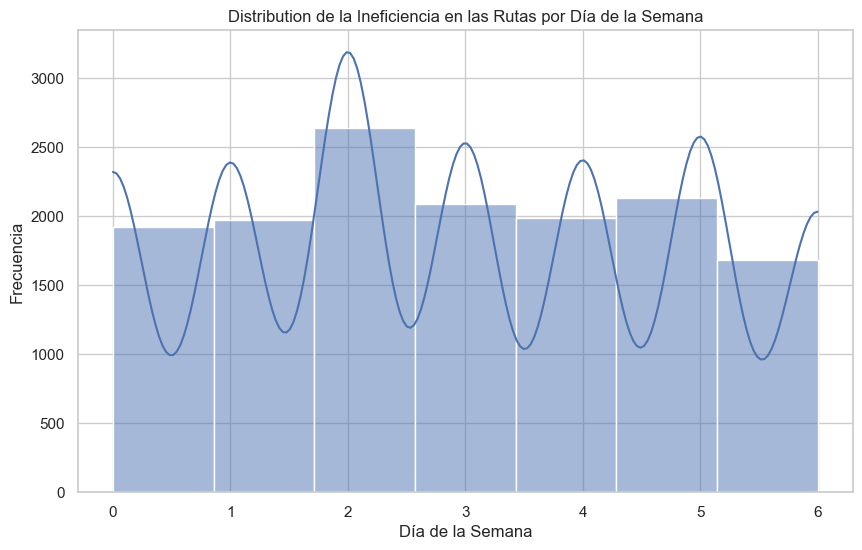

In [269]:
inefficient_data['day_of_week'] = pd.to_datetime(inefficient_data['initial_format_date']).dt.dayofweek

plt.figure(figsize=(10, 6))
sns.histplot(inefficient_data['day_of_week'], bins=7, kde=True)
plt.title('Distribution de la Ineficiencia en las Rutas por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Frecuencia')
plt.show()

In [270]:
inefficient_data

,trip_uuid,route_type,source_name,destination_name,actual_distance_to_destination,actual_time,segment_actual_time,segment_osrm_distance,segment_osrm_time,initial_format_date,source_state,destination_state,source_coordenates,destination_coordenates,source_clusters,destination_clusters,efficiency,day_of_week
0,trip-153671041653548748,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),8860.812105,15682.0,39.692308,33.858290,25.846154,2018-09-12,Madhya Pradesh,Uttar Pradesh,"(23.8143419, 77.5340719)","(27.1303344, 80.859666)",2,2,1.535714,2
1,trip-153671042288605164,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),240.208306,399.0,15.666667,9.354378,7.222222,2018-09-12,Karnataka,Karnataka,"(14.5203896, 75.7223521)","(14.5203896, 75.7223521)",1,1,2.169231,2
2,trip-153671043369099517,FTL,Bangalore_Nelmngla_H (Karnataka),Gurgaon_Bilaspur_HB (Haryana),68163.502238,112225.0,37.168539,28.598515,21.808989,2018-09-12,Karnataka,Haryana,"(14.5203896, 75.7223521)","(29.0, 76.0)",1,2,1.704276,2
3,trip-153671046011330457,Carting,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),28.529648,82.0,29.500000,9.938300,8.000000,2018-09-12,Maharashtra,Maharashtra,"(18.9068356, 75.6741579)","(18.9068356, 75.6741579)",1,1,3.687500,2
4,trip-153671052974046625,FTL,Bellary_Dc (Karnataka),Hospet (Karnataka),239.007304,556.0,48.571429,20.970271,16.428571,2018-09-12,Karnataka,Karnataka,"(14.5203896, 75.7223521)","(14.5203896, 75.7223521)",1,1,2.956522,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,Carting,Chandigarh_Mehmdpur_H (Punjab),Zirakpur_DC (Punjab),141.057373,186.0,11.714286,9.265014,8.857143,2018-10-03,Punjab,Punjab,"(30.9293211, 75.5004841)","(30.9293211, 75.5004841)",2,2,1.322581,2
14783,trip-153861104386292051,Carting,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),25.130640,33.0,10.500000,8.044150,5.500000,2018-10-03,Haryana,Haryana,"(29.0, 76.0)","(29.0, 76.0)",2,2,1.909091,2
14784,trip-153861106442901555,Carting,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_GovndNgr_DC (Uttar Pradesh),93.743842,549.0,46.833333,17.481100,14.666667,2018-10-03,Uttar Pradesh,Uttar Pradesh,"(27.1303344, 80.859666)","(27.1303344, 80.859666)",2,2,3.193182,2
14785,trip-153861115439069069,Carting,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Eral_Busstand_D (Tamil Nadu),355.281673,600.0,15.176471,13.148965,13.000000,2018-10-03,Tamil Nadu,Tamil Nadu,"(10.9094334, 78.3665347)","(10.9094334, 78.3665347)",1,1,1.167421,2


Para no afectar las demás variables, extraer las filas segment_actual_time y segment_osrm_time de dataframe df

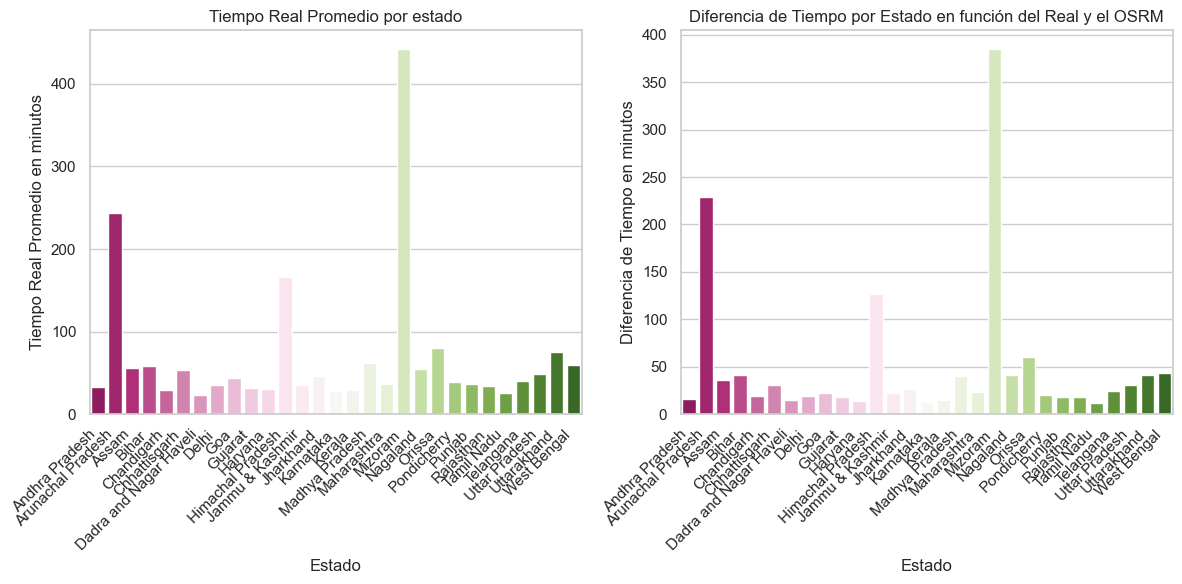

In [280]:
# Calculate average times by state
efficiency_stats = df_computed.groupby('source_state').agg({
    'segment_actual_time': 'mean',
    'segment_osrm_time': 'mean'
}).reset_index()

efficiency_stats['time_difference'] = efficiency_stats['segment_actual_time'] - efficiency_stats['segment_osrm_time']


plt.figure(figsize=(12, 6))

# Barplot for Average Actual Time
plt.subplot(1, 2, 1)
sns.barplot(data=efficiency_stats, x='source_state', y='segment_actual_time', palette='PiYG', hue='source_state', legend=False)
plt.title('Tiempo Real Promedio por estado')
plt.xlabel('Estado')
plt.ylabel('Tiempo Real Promedio en minutos')
plt.xticks(rotation=45, ha='right')

# Barplot for Time Difference
plt.subplot(1, 2, 2)
sns.barplot(data=efficiency_stats, x='source_state', y='time_difference', palette='PiYG', hue='source_state', legend=False)
plt.title('Diferencia de Tiempo por Estado en función del Real y el OSRM')
plt.xlabel('Estado')
plt.ylabel('Diferencia de Tiempo en minutos')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


## Tiempo real promedio por tipo de viaje

In [34]:
av_time_route = df_computed.groupby('route_type').agg({
    'segment_actual_time': 'mean',
    'segment_osrm_time': 'mean'
}).reset_index()


In [35]:
av_time_route

,route_type,segment_actual_time,segment_osrm_time
0,Carting,28.767197,10.715717
1,FTL,51.418994,23.159548


In [41]:
av_time_route['average_time_difference'] = av_time_route['segment_actual_time'] - av_time_route['segment_osrm_time'] 
av_time_route

,route_type,segment_actual_time,segment_osrm_time,average_time_difference
0,Carting,28.767197,10.715717,18.051479
1,FTL,51.418994,23.159548,28.259446


Text(0, 0.5, 'Tiempo de dien minutos')

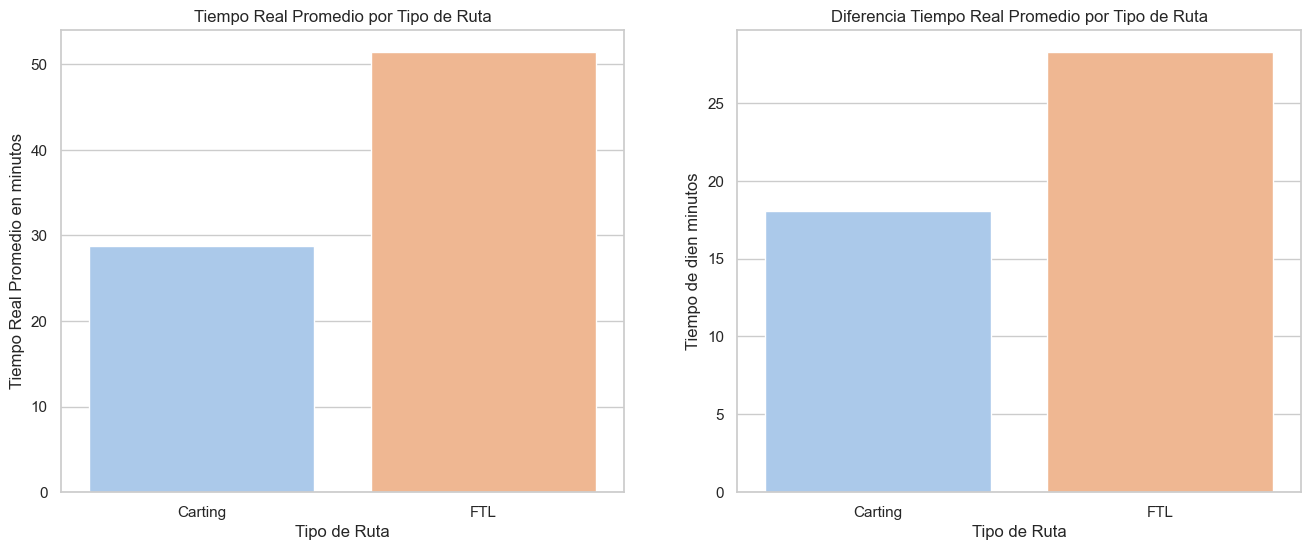

In [46]:
plt.figure(figsize=(16,6))

plt.subplot(1, 2, 1)
sns.barplot(x='route_type', y='segment_actual_time', data=av_time_route, palette='pastel', hue='route_type', legend=False)
plt.title('Tiempo Real Promedio por Tipo de Ruta')
plt.xlabel('Tipo de Ruta')
plt.ylabel('Tiempo Real Promedio en minutos')


plt.subplot(1, 2, 2)

sns.barplot(x='route_type', y='average_time_difference', data=av_time_route, palette='pastel', hue='route_type', legend=False)
plt.title('Diferencia Tiempo Real Promedio por Tipo de Ruta')
plt.xlabel('Tipo de Ruta')
plt.ylabel('Tiempo de dien minutos')

## Estadísticas según el conjunto de datos del tiempo del recorrido

In [ ]:
trip_time_trends = df_computed.groupby('initial_format_time').agg({
    
})